In [33]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H 
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
import pandas as pd 
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import numpy as np
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!jupyter nbextension enable --py widgetsnbextension
from tqdm.notebook import tqdm, tnrange, trange

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [38]:
with open(r'H_smiles.dat') as file:
    smiles=file.read()
smiles_list=smiles.strip().split("\n")

In [41]:
EmbedMultipleConfs(mol_h,numConfs=50)
print("Number of conformers is ", mol_h.GetNumConformers())

Number of conformers is  49


In [22]:
smiles[:500]

['[H]C([H])([H])[H]\n',
 '[H]N([H])[H]\n',
 '[H]O[H]\n',
 '[H]C#C[H]\n',
 '[H]C#N\n',
 '[H]C([H])=O\n',
 '[H]C([H])([H])C([H])([H])[H]\n',
 '[H]OC([H])([H])[H]\n',
 '[H]C#CC([H])([H])[H]\n',
 '[H]C([H])([H])C#N\n',
 '[H]C(=O)C([H])([H])[H]\n',
 '[H]C(=O)N([H])[H]\n',
 '[H]C([H])([H])C([H])([H])C([H])([H])[H]\n',
 '[H]OC([H])([H])C([H])([H])[H]\n',
 '[H]C([H])([H])OC([H])([H])[H]\n',
 '[H]C1([H])C([H])([H])C1([H])[H]\n',
 '[H]C1([H])OC1([H])[H]\n',
 '[H]C([H])([H])C(=O)C([H])([H])[H]\n',
 '[H]N([H])C(=O)C([H])([H])[H]\n',
 '[H]N([H])C(=O)N([H])[H]\n',
 '[H]C([H])([H])C([H])(C([H])([H])[H])C([H])([H])[H]\n',
 '[H]OC([H])(C([H])([H])[H])C([H])([H])[H]\n',
 '[H]C#CC#C[H]\n',
 '[H]C#CC#N\n',
 'N#CC#N\n',
 '[H]C#CC([H])=O\n',
 '[H]C(=O)C#N\n',
 '[H]C(=O)C([H])=O\n',
 '[H]C([H])([H])C#CC([H])([H])[H]\n',
 '[H]C#CC([H])([H])C([H])([H])[H]\n',
 '[H]C([H])([H])C([H])([H])C#N\n',
 '[H]N([H])C([H])([H])C#N\n',
 '[H]C#CC([H])([H])O[H]\n',
 '[H]OC([H])([H])C#N\n',
 '[H]C(=O)C([H])([H])C([H])([H])[H]

In [23]:
vols=[]
for smi in smiles[:500]:
    mol=Chem.MolFromSmiles(smi)
    mol_h=Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol_h)
    vols.append(AllChem.ComputeMolVolume(mol_h))


ValueError: Bad Conformer Id

C:\Users\Prajay\anaconda3\envs\rdkit-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

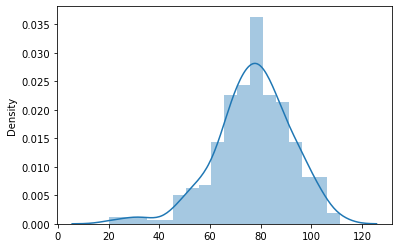

In [31]:
#!pip install seaborn
#import seaborn as sns
sns.distplot(vols)


(array([ 3.,  4.,  3., 18., 32., 71., 80., 56., 34., 14.]),
 array([ 20.04  ,  29.1664,  38.2928,  47.4192,  56.5456,  65.672 ,
         74.7984,  83.9248,  93.0512, 102.1776, 111.304 ]),
 <BarContainer object of 10 artists>)

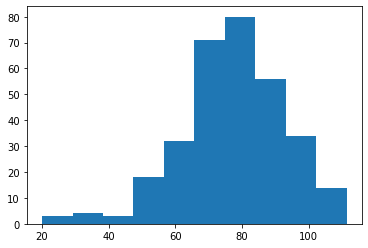

In [30]:
plt.hist(vols)

In [53]:
df = pd.DataFrame(smiles_list,columns=['smiles']).sample(1000)

,smiles,ROMol
59414,[H]C(=O)C1(C([H])([H])[H])N(C([H])(C([H])([H])...,
123782,[H]n1nnn([H])c1=NC1([H])C([H])([H])C1([H])[H],
76214,[H]C1=C(N([H])[H])C([H])(C([H])([H])[H])C(=O)C1=O,
103690,[H]C#CC1(C([H])([H])[H])C([H])([H])C1(C([H])([...,
64329,[H]N1C(=O)N([H])C(C([H])([H])[H])(C([H])([H])[...,

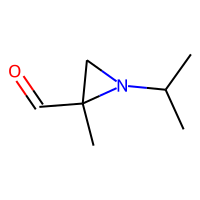
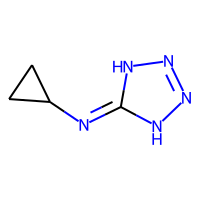
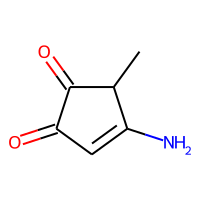
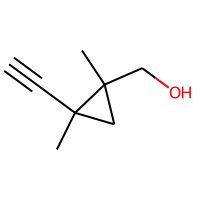
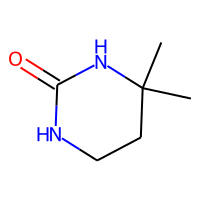

In [54]:
PandasTools.AddMoleculeColumnToFrame(df,smilesCol="smiles")
df.head() 

,smiles,ROMol,target
59414,[H]C(=O)C1(C([H])([H])[H])N(C([H])(C([H])([H])...,,1
123782,[H]n1nnn([H])c1=NC1([H])C([H])([H])C1([H])[H],,2
76214,[H]C1=C(N([H])[H])C([H])(C([H])([H])[H])C(=O)C1=O,,1
103690,[H]C#CC1(C([H])([H])[H])C([H])([H])C1(C([H])([...,,1
64329,[H]N1C(=O)N([H])C(C([H])([H])[H])(C([H])([H])[...,,1

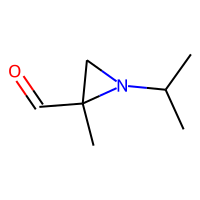
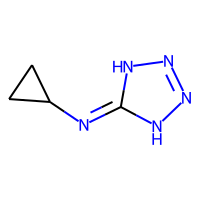
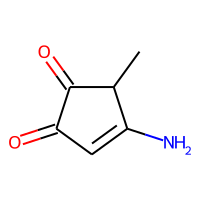
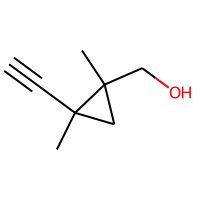
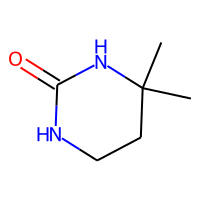

In [55]:
# generating the target values - molecular weights.
# we use the CalcExactMolWt function from rdkit
df["target"] = df["ROMol"].apply(CalcNumRings)
df.head()

,smiles,ROMol,target,input
59414,[H]C(=O)C1(C([H])([H])[H])N(C([H])(C([H])([H])...,,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
123782,[H]n1nnn([H])c1=NC1([H])C([H])([H])C1([H])[H],,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
76214,[H]C1=C(N([H])[H])C([H])(C([H])([H])[H])C(=O)C1=O,,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
103690,[H]C#CC1(C([H])([H])[H])C([H])([H])C1(C([H])([...,,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
64329,[H]N1C(=O)N([H])C(C([H])([H])[H])(C([H])([H])[...,,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."

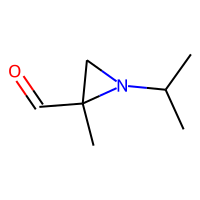
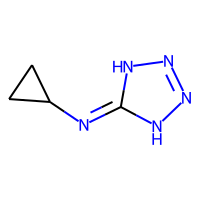
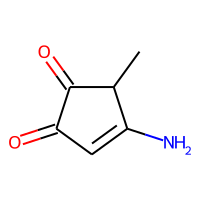
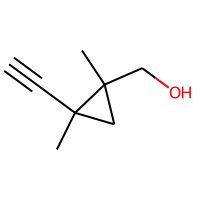
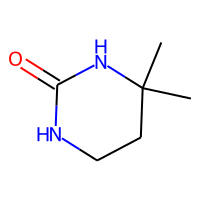

In [64]:
# we define a function to generate a vector from a molecule object

def get_input(mol):
    fp = GetMorganFingerprintAsBitVect(mol, 2, nBits=4096) # gets the vector
    arr = np.zeros((0,))
    ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
    return arr

df["input"] = df["ROMol"].apply(get_input) # adding the input column to the dataframe
df.head()

## Machine Learning Model
Trying to predict the number of rings given a specific representation

Input - Fingerprints

Output - Number of Rings

In [65]:
# The input values must be in the for of a vector/list
# Here we assign the values from the dataframe to X and y
X = df["input"].values.tolist()
y = df["target"].values.tolist()
print("Input",X[0])
print("Target",y[0])

Input [0. 0. 0. ... 0. 0. 0.]
Target 1


In [66]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42) # split data for training and testing
model = RandomForestClassifier(random_state=42) # initialize the model
model.fit(X_train, y_train) # train the model
y_predict = model.predict(X_test) # get prediction on the test set


<AxesSubplot:>

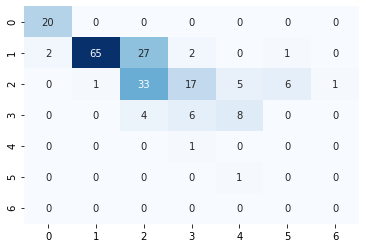

In [67]:
confusion_mat = metrics.confusion_matrix(y_predict,y_test)
sns.heatmap(confusion_mat,annot=True,cmap="Blues",cbar=False)

In [98]:
from sklearn.linear_model import Lasso
df["MM"] = df["ROMol"].apply(CalcExactMolWt)
X = df["input"].values.tolist()
y = df["MM"].values.tolist()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42) # split data for training and testing
model = Lasso(random_state=58) # initialize the model
model.fit(X_train, y_train) # train the model
y_predict = model.predict(X_test) # get prediction on the test set


Text(0, 0.5, 'Predicted values')

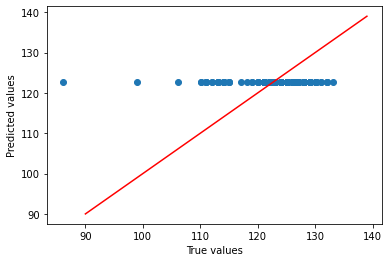

In [99]:
metrics.mean_squared_error(y_predict,y_test)
plt.scatter(y_test,y_predict)
x = np.arange(90,140)
plt.plot(x,x,color="red")
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [100]:
metrics.mean_squared_error(y_predict,y_test)

33.77805584217574